## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 09.09.2022

Мягкий дедлайн: 23:59MSK 22.09.2022

Жесткий дедлайн: 23:59MSK 29.09.2022

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [306]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [307]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [308]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [309]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [310]:
# !powershell iwr -outf somefile https://somesite/somefile

In [311]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [312]:
# your code
df = pd.read_excel('end_seminar.xlsx')
df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [313]:
df.isnull().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [314]:
from numpy.core import numeric
# your code
objects_mask = (df.dtypes == 'object').values
a = df[df.columns[objects_mask]].fillna("")
numeric_mask = df.columns[~objects_mask]
b = df[numeric_mask].fillna(0)
df = pd.concat([a,b],axis = 1)
df.head()


,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,rating,18_group,is_mi,percentile,17_group,is_ml_student
0,93ff79a51cd602f1dd3028ba2c129503,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,,2020-05-15 01:12:50.543,698,181.0,0.0,0.183857,0.0,0.0
1,26b01b1c4cd5656bab18d24c548834fb,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,,2020-05-15 02:46:48.066,647,181.0,0.0,0.426009,0.0,0.0
2,30f3653fc176d54e89ac3179c455c6dd,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,,2020-05-15 03:12:41.480,624,185.0,0.0,0.538117,0.0,0.0
3,1528f0eaa027580820ccf0d92a53ad68,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,,2020-05-15 04:43:08.994,579,182.0,0.0,0.744395,0.0,0.0
4,496ea4f0d4abe264b1bb1b80eb3830c5,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,,2020-05-15 07:47:17.197,572,183.0,0.0,0.780269,0.0,0.0


In [315]:
df.isnull().sum()

id               0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
blended          0
timestamp        0
rating           0
18_group         0
is_mi            0
percentile       0
17_group         0
is_ml_student    0
dtype: int64

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [316]:
df['is_first_time'].value_counts()

Да     308
Нет     51
         2
Name: is_first_time, dtype: int64

In [317]:
# your code
df['is_first_time'].value_counts()
df = df.sort_values(by=['timestamp'], ascending=False)
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
print(f'Всего ответов "нет" {(df ["is_first_time"] == "Нет").sum()}. Без повторении {(df ["is_first_time"] == "Нет").sum()}' )



Всего ответов "нет" 51. Без повторении 51


In [318]:
df.tail

<bound method NDFrame.tail of                                    id                                fall_1  \
222  9d19b0d5f4fc8d7edc2258406f872c4e      Безопасность компьютерных систем   
221  04bcb5c9d23813ffa940e1febb27fadc                     Теория баз данных   
360  f2d210ace25a841e1e58036b257d5d47     Анализ неструктурированных данных   
359  79d14db48e4737af731960ae212d5134      Безопасность компьютерных систем   
220  1341f488fae5f1ccf164960fd6506cd0                              Язык SQL   
..                                ...                                   ...   
227  1bbbfae51794b83c769b634be8da7b8d      Безопасность компьютерных систем   
226  5a9b8ac11ad05b39a58b0e04a263bf4c  Глубинное обучение в обработке звука   
225  881b1a6fda195b354ae2edb396a69f5d      Безопасность компьютерных систем   
224  253bbe1a2021d0404712a1e4acd22939      Безопасность компьютерных систем   
223  d555d2805e1d93d4f023e57dc4c8f403      Безопасность компьютерных систем   

                     

#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [319]:
# Тут и дальше работа будет с dataframe df т.к. сказано использовать данные без повторов
print("Заявки 18-го года:",(df['18_group'] != 0).sum())
print("Заявки 17-го года:",(df['17_group']!= 0).sum())


Заявки 18-го года: 213
Заявки 17-го года: 134


In [320]:
df['18_group'].value_counts()
df['17_group'].value_counts()

0.0      213
172.0     28
171.0     26
175.0     26
173.0     19
176.0     17
174.0     15
177.0      3
Name: 17_group, dtype: int64

In [321]:
print('Есть студенты с равными перцентилями:')
df.id[df.percentile.duplicated(keep = False)]

Есть студенты с равными перцентилями:


80     3e106aaef8b24dbb01319c73e14c2936
231    3a7326c9e355a67d3805824ca34c4bc5
Name: id, dtype: object

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)? 

- Курсы: DevOps,Соревновательный анализ данных, введение в дифференциальную геометрию;
- Наибольшее кол-во студентов на курсе DevOps;
- на введении в дифференциальной геометрии наибольший рейтинг 1210 ( надеюсь здесть это очки знании, а не позиция в списке успеваймости)


In [322]:
# your code
df.blended.value_counts()

                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: blended, dtype: int64

In [323]:
df.groupby('blended').rating.mean() # Посчитал по всем курсам среднии рейтинг

blended
                                          633.901408
DevOps                                   1154.172414
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [324]:
df.columns

Index(['id', 'fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3',
       'is_first_time', 'blended', 'timestamp', 'rating', '18_group', 'is_mi',
       'percentile', '17_group', 'is_ml_student'],
      dtype='object')

In [325]:
# your code
a = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
b = df.groupby(a, as_index = False)
b = b.size() [b.size()['size'] >1]
b



,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,size
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [326]:
# your code
a = ['fall_1',
 'fall_2',
 'fall_3',
 'spring_1',
 'spring_2',
 'spring_3',
 'blended',
 '17_group']
b = df[a]
b =  b[b['17_group'] > 0]
a = ['fall_1',
 'fall_2',
 'fall_3',
 'spring_1',
 'spring_2',
 'spring_3',
 'blended']
gr_17 = b [a]
gr_17 = pd.DataFrame(gr_17.stack().unique())
gr_17
b[a]

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended
360,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,Соревновательный анализ данных
359,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,DevOps
358,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Соревновательный анализ данных
357,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,DevOps
356,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps
...,...,...,...,...,...,...,...
227,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps
226,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,DevOps
225,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,DevOps
224,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,DevOps


In [327]:
a = ['fall_1',
 'fall_2',
 'fall_3',
 'spring_1',
 'spring_2',
 'spring_3',
 'blended',
 '18_group']
b = df[a]
b =  b[b['18_group'] > 0]
a = ['fall_1',
 'fall_2',
 'fall_3',
 'spring_1',
 'spring_2',
 'spring_3',
 'blended']
gr_18 = b [a]
gr_18.loc[:,'blended' ] = '0'
# gr_18
gr_18 = pd.DataFrame(gr_18.stack().unique())
gr_18

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,0
0,Безопасность компьютерных систем
1,Язык SQL
2,Высокопроизводительные вычисления
3,Компьютерные сети
4,Дискретная оптимизация
5,Численные методы
6,0
7,Теория баз данных
8,Машинное обучение 2
9,Промышленное программирование на языке Java


In [328]:
gr_18.merge(gr_17, how = 'inner')

,0
0,Безопасность компьютерных систем
1,Высокопроизводительные вычисления
2,Численные методы
3,Моделирование временных рядов
4,Принятие решений в условиях риска и неопределё...
5,Сбор и обработка данных с помощью краудсорсинга
6,Statistical Learning Theory


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [329]:
# Почему-то оставляет "Безопасность компьютерных систем", хотя остальное верно вроде

unique_17 = gr_17[0].map(lambda x: x == gr_18).sum()
gr_17[~unique_17].dropna()


,0
1,Моделирование временных рядов
3,Обучение с подкреплением
4,Компьютерное зрение
6,Соревновательный анализ данных
7,Безопасность компьютерных систем
8,Принятие решений в условиях риска и неопределё...
9,Проектирование и разработка высоконагруженных ...
10,DevOps
12,Statistical Learning Theory
15,Байесовские методы машинного обучения


In [330]:
np.setdiff1d(gr_17,gr_18)

array(['DevOps', 'Анализ неструктурированных данных',
       'Байесовские методы машинного обучения',
       'Введение в дифференциальную геометрию',
       'Генеративные модели в машинном обучении',
       'Глубинное обучение в обработке звука', 'Компьютерное зрение',
       'Конфликты и кооперация', 'Методы сжатия и передачи медиаданных',
       'Обучение с подкреплением',
       'Проектирование и разработка высоконагруженных сервисов',
       'Символьные вычисления', 'Соревновательный анализ данных'],
      dtype=object)

In [331]:
np.setdiff1d(gr_18,gr_17)

array(['0', 'Анализ данных в бизнесе', 'Дискретная оптимизация',
       'Дополнительные главы прикладной статистики', 'Компьютерные сети',
       'Матричные вычисления', 'Машинное обучение 2',
       'Промышленное программирование на языке Java',
       'Системы баз данных', 'Теория баз данных', 'Язык SQL'],
      dtype=object)

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [332]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')
# your code

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

<BarContainer object of 10 artists>

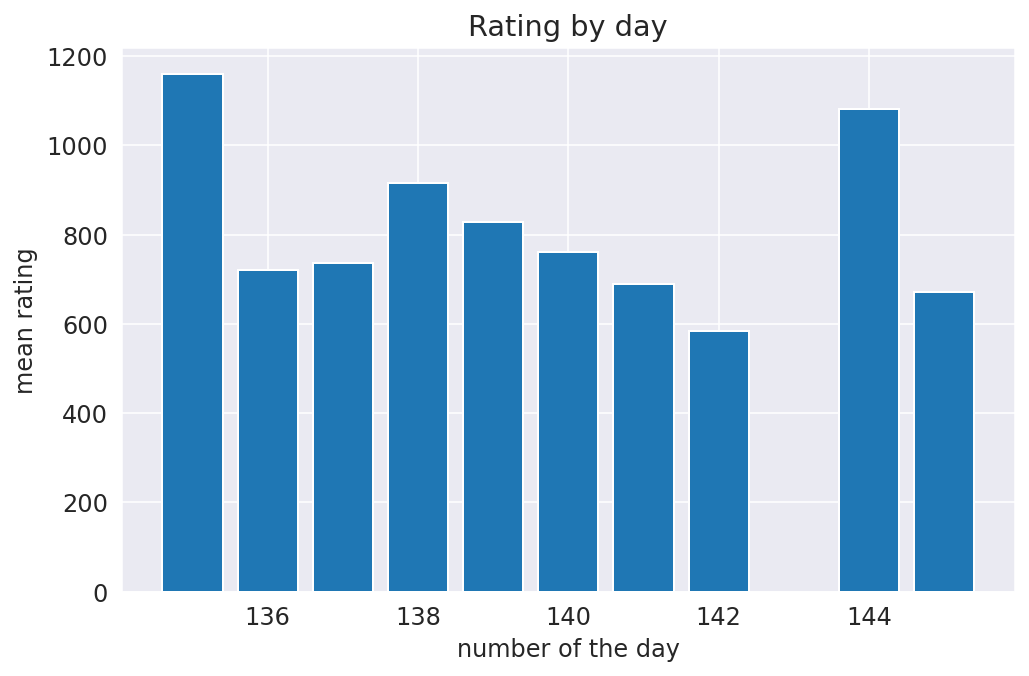

In [333]:
# your code
data = df.groupby(['timestamp','rating']).mean()
data = pd.concat([df.timestamp.map(lambda x: x.dayofyear), df.rating],axis = 1)
x = data.groupby('timestamp').mean()
y = x.rating
x = x.index
plt.ylabel('mean rating')
plt.xlabel('number of the day')
plt.title('Rating by day')
plt.bar(x,y)

Сохраните график в формате pdf (так он останется векторизованным).

In [334]:
# your code
plt.savefig("plot.pdf")

<Figure size 576x360 with 0 Axes>

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [335]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [336]:
# (￣^￣)ゞ
# print(df.columns)
df['course_atn'] = 1
df.loc[(171 <= df['17_group']) & (df['17_group'] <= 173) | (df['is_mi'] == 1), 'course_atn'] = 2
df.tail()

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,rating,18_group,is_mi,percentile,17_group,is_ml_student,course_atn
227,1bbbfae51794b83c769b634be8da7b8d,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,DevOps,2020-05-14 21:10:54.945,1078,0.0,0.0,0.789855,176.0,0.0,1
226,5a9b8ac11ad05b39a58b0e04a263bf4c,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,DevOps,2020-05-14 21:03:02.916,1170,0.0,0.0,0.442029,171.0,0.0,2
225,881b1a6fda195b354ae2edb396a69f5d,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,DevOps,2020-05-14 20:52:42.734,1084,0.0,0.0,0.782609,172.0,0.0,2
224,253bbe1a2021d0404712a1e4acd22939,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,DevOps,2020-05-14 20:47:13.833,1106,0.0,0.0,0.673913,176.0,0.0,1
223,d555d2805e1d93d4f023e57dc4c8f403,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да,DevOps,2020-05-14 20:23:21.662,996,0.0,0.0,0.963768,172.0,0.0,2


Проверка:

In [337]:
col_name = 'course_atn'  # insert your new column name as str

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [338]:
from pandas.core.arrays.interval import NA
# # (￣^￣)ゞ
# df = df
# df_ = df
# df_['is_first_place'] = np.nan
# df_['is_last_place'] = np.nan
# courses = { 'Анализ неструктурированных данных' : 300,
#             'Statistical Learning Theory' : 60,
#             'Высокопроизводительные вычисления' : 60,
#             'Байесовские методы машинного обучения' : 30,
#             'Безопасность компьютерных систем' : 30,
#             'Глубинное обучение в обработке звука' : 30, 
#             'Матричные вычисления' : 30,
#             'Моделирование временных рядов' : 30,
#             'Принятие решений в условиях риска и неопределённости' : 30,
#             'Сбор и обработка данных с помощью краудсорсинга' : 30,
#             'Теория баз данных' : 30, 
#             'Язык SQL' : 30} 
# df_courses = { 'Анализ неструктурированных данных' : 300,
#             'Statistical Learning Theory' : 60,
#             'Высокопроизводительные вычисления' : 60,
#             'Байесовские методы машинного обучения' : 30,
#             'Безопасность компьютерных систем' : 30,
#             'Глубинное обучение в обработке звука' : 30, 
#             'Матричные вычисления' : 30,
#             'Моделирование временных рядов' : 30,
#             'Принятие решений в условиях риска и неопределённости' : 30,
#             'Сбор и обработка данных с помощью краудсорсинга' : 30,
#             'Теория баз данных' : 30, 
#             'Язык SQL' : 30} 
# col = list(courses.keys())
# col.append('Id')

# rez = pd.DataFrame(df.id, None, ['id'])
# rez['course_1'] = '???'
# rez['course_2'] = '???'
# df = df.sort_values(by = ['percentile'],ascending=False)

# def destribute (n_fall, courses, rez):
#   fall = 'fall_' + str(n_fall) 
#   for i in df.index:
#     if (n_fall == 3):
#           if (df.loc[i,'course_atn'] == 1):
#             rez.loc[i,'course_2'] = '-'
    
#     id = df.loc[i, 'id']
#     crs = df.loc[i, fall]
    
#     if (courses[crs] > 0):

#       courses[crs] -= 1

#       if (rez.loc[i,'course_1'] == '???'):
#         rez.loc[i,'course_1'] = crs
#       elif (rez.loc[i,'course_2'] == '???'):
#           rez.loc[i,'course_2'] = crs

      
      

#   return rez
coureses = np.unique((df[["fall_1", "fall_2", "fall_3"]].values).ravel())
courses_dict = {'Statistical Learning Theory' : 60, 'Анализ неструктурированных данных' : 1000,
       'Байесовские методы машинного обучения' : 30,
       'Безопасность компьютерных систем' : 30,
       'Высокопроизводительные вычисления' : 60,
       'Глубинное обучение в обработке звука' : 30, 'Матричные вычисления' : 30,
       'Моделирование временных рядов' : 30,
       'Принятие решений в условиях риска и неопределённости' : 30,
       'Сбор и обработка данных с помощью краудсорсинга' : 30,
       'Теория баз данных' : 30, 'Язык SQL' : 30} 

df['course1'] = '???'
df['course2'] = '???'
df['is_first_place'] = np.nan
df['is_last_place'] = np.nan



for course in courses:  
    course_df = df.loc[((df['course1'] == '???') | ((df['course1'] != course)) & \
            (df['course2'] == '???') & (df['course_atn'] == 2)) & \
            (((df['fall_2'] == course) & (df['course_atn'] == 2)) | (df['fall_1'] == course))]
    course_df = course_df.sort_values(by=['percentile'])
    course_df = course_df.iloc[:courses_dict[course]]
    courses_dict[course] -= course_df.shape[0]
    
    # запись на первый курс
    df.loc[(df['id'].isin(course_df['id'])) & (df['course1'] == '???'), 'course1'] = course
    # запись на второй курс
    df.loc[(df['id'].isin(course_df['id'])) & (df['course1'] != course) & (df['course2'] == '???') & (df['course_atn'] == 2), 'course2'] = course

    df.loc[course_df.index[0],"is_first_place"] = True
    df.loc[course_df.index[-1], "is_last_place"] = True



In [339]:
df

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,...,18_group,is_mi,percentile,17_group,is_ml_student,course_atn,course1,course2,is_first_place,is_last_place
222,9d19b0d5f4fc8d7edc2258406f872c4e,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,,2020-05-24 01:23:31.946,...,188.0,0.0,0.197309,0.0,0.0,1,Безопасность компьютерных систем,???,NaN,NaN
221,04bcb5c9d23813ffa940e1febb27fadc,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,,2020-05-24 01:21:31.946,...,186.0,0.0,0.430493,0.0,0.0,1,Теория баз данных,???,NaN,NaN
360,f2d210ace25a841e1e58036b257d5d47,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,Соревновательный анализ данных,2020-05-23 21:16:40.916,...,0.0,0.0,0.369565,176.0,0.0,1,Анализ неструктурированных данных,???,NaN,NaN
359,79d14db48e4737af731960ae212d5134,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,DevOps,2020-05-23 21:16:40.916,...,0.0,0.0,0.985507,172.0,0.0,2,Принятие решений в условиях риска и неопределё...,???,NaN,NaN
220,1341f488fae5f1ccf164960fd6506cd0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,,2020-05-21 16:33:15.899,...,188.0,0.0,0.721973,0.0,0.0,1,Язык SQL,???,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1bbbfae51794b83c769b634be8da7b8d,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,DevOps,2020-05-14 21:10:54.945,...,0.0,0.0,0.789855,176.0,0.0,1,???,???,NaN,NaN
226,5a9b8ac11ad05b39a58b0e04a263bf4c,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,DevOps,2020-05-14 21:03:02.916,...,0.0,0.0,0.442029,171.0,0.0,2,Statistical Learning Theory,Глубинное обучение в обработке звука,NaN,NaN
225,881b1a6fda195b354ae2edb396a69f5d,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,DevOps,2020-05-14 20:52:42.734,...,0.0,0.0,0.782609,172.0,0.0,2,Анализ неструктурированных данных,???,NaN,NaN
224,253bbe1a2021d0404712a1e4acd22939,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,DevOps,2020-05-14 20:47:13.833,...,0.0,0.0,0.673913,176.0,0.0,1,???,???,NaN,NaN


In [340]:
# rez = destribute (1,courses, rez)
# rez = destribute(2,courses, rez)
# rez = destribute(3,courses, rez)

In [341]:
# rez.rename(columns = {'id' : 'ID', 'course_1': 'course1','course_2' : 'course2'})

In [342]:
# df_['course_1'] = rez['course_1']
# df_['course_2'] = rez['course_2']
# df_ = df_.sort_values(by = ['percentile'])
# cor = []
# i = 0
# for i in df_.index:
#   if not(df_.loc[i,'course_1'] in cor):
#     df_.loc[i,'is_first_place'] = True
#     cor.append(df_.loc[i,'course_1'])
#   if (not(df_.loc[i,'course_2'] in cor) and (df_.loc[i,'course_2'] != '-')):
#     df_.loc[i,'is_first_place'] = True
#     cor.append(df_.loc[i,'course_2'])

# df_ = df_.sort_values(by = ['percentile'],ascending=False)
# cor = []
# for i in df_.index:
#   if not(df_.loc[i,'course_1'] in cor):
#     df_.loc[i,'is_last_place'] = True
#     cor.append(df_.loc[i,'course_1'])
#   if (not(df_.loc[i,'course_2'] in cor) and (df_.loc[i,'course_2'] != '-')):
#     df_.loc[i,'is_last_place'] = True
#     cor.append(df_.loc[i,'course_2'])
# df_ = df_.sort_index()

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [343]:
df.columns

Index(['id', 'fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3',
       'is_first_time', 'blended', 'timestamp', 'rating', '18_group', 'is_mi',
       'percentile', '17_group', 'is_ml_student', 'course_atn', 'course1',
       'course2', 'is_first_place', 'is_last_place'],
      dtype='object')

In [344]:
df

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,...,18_group,is_mi,percentile,17_group,is_ml_student,course_atn,course1,course2,is_first_place,is_last_place
222,9d19b0d5f4fc8d7edc2258406f872c4e,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,,,2020-05-24 01:23:31.946,...,188.0,0.0,0.197309,0.0,0.0,1,Безопасность компьютерных систем,???,NaN,NaN
221,04bcb5c9d23813ffa940e1febb27fadc,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,,2020-05-24 01:21:31.946,...,186.0,0.0,0.430493,0.0,0.0,1,Теория баз данных,???,NaN,NaN
360,f2d210ace25a841e1e58036b257d5d47,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,Соревновательный анализ данных,2020-05-23 21:16:40.916,...,0.0,0.0,0.369565,176.0,0.0,1,Анализ неструктурированных данных,???,NaN,NaN
359,79d14db48e4737af731960ae212d5134,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,DevOps,2020-05-23 21:16:40.916,...,0.0,0.0,0.985507,172.0,0.0,2,Принятие решений в условиях риска и неопределё...,???,NaN,NaN
220,1341f488fae5f1ccf164960fd6506cd0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,,2020-05-21 16:33:15.899,...,188.0,0.0,0.721973,0.0,0.0,1,Язык SQL,???,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1bbbfae51794b83c769b634be8da7b8d,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,DevOps,2020-05-14 21:10:54.945,...,0.0,0.0,0.789855,176.0,0.0,1,???,???,NaN,NaN
226,5a9b8ac11ad05b39a58b0e04a263bf4c,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,DevOps,2020-05-14 21:03:02.916,...,0.0,0.0,0.442029,171.0,0.0,2,Statistical Learning Theory,Глубинное обучение в обработке звука,NaN,NaN
225,881b1a6fda195b354ae2edb396a69f5d,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,DevOps,2020-05-14 20:52:42.734,...,0.0,0.0,0.782609,172.0,0.0,2,Анализ неструктурированных данных,???,NaN,NaN
224,253bbe1a2021d0404712a1e4acd22939,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,DevOps,2020-05-14 20:47:13.833,...,0.0,0.0,0.673913,176.0,0.0,1,???,???,NaN,NaN


In [345]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')
# check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)

In [346]:
df.is_last_place[135]

True

In [347]:
fir_col_name = 'is_first_place'   # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'     # insert name of your new column with is_last_place as str
# df = df_
# df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)

assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       == 
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [348]:
for course in courses: 
    course_df = df.loc[((df['course1'] == '???') | ((df['course1'] != course)) & \
            (df['course2'] == '???') & (df['course_atn'] == 2)) & \
            (((df['fall_3'] == course) & (df['course_atn'] == 2)) | (df['fall_2'] == course))]
    course_df = course_df.sort_values(by=['percentile'])
    course_df = course_df.iloc[:courses_dict[course]]
    # print(course_df.shape[0])
    courses_dict[course] -= course_df.shape[0]
    
    df.loc[(df['id'].isin(course_df['id'])) & (df['course1'] == '???'), 'course1'] = course
    df.loc[(df['id'].isin(course_df['id'])) & (df['course1'] != course) & (df['course2'] == '???') & (df['course_atn'] == 2), 'course2'] = course


In [349]:
for course in courses:  
    course_df = df.loc[((df['course1'] == '???') | ((df['course1'] != course)) & \
            (df['course2'] == '???') & (df['course_atn'] == 2)) & \
            (((df[f'fall_3'] == course) & (df['course_atn'] == 2)) | (df['fall_3'] == course))]
    course_df = course_df.sort_values(by=['percentile'])
    course_df = course_df.iloc[:courses_dict[course]]
    courses_dict[course] -= course_df.shape[0]

    df.loc[(df['id'].isin(course_df['id'])) & (df['course1'] == '???'), 'course1'] = course
    df.loc[(df['id'].isin(course_df['id'])) & (df['course1'] != course) & (df['course2'] == '???') & (df['course_atn'] == 2), 'course2'] = course


In [350]:
_ = df
df.loc[df[df["course_atn"] == 1].index, "course2"] = '-'
_ = df[['id', 'course1', 'course2']]
_.rename(columns={'id' : 'ID'}, inplace=True)
_ = _.sort_values('ID')
_

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID,course1,course2
161,00b40fe7dbfd23e5daba765244509415,Матричные вычисления,-
76,014b72217e20370dab7acc48b20c47be,Statistical Learning Theory,-
335,01b072a0cdb45814fc4ab8ca3e621f0e,Анализ неструктурированных данных,???
88,044e038535ae5d2ff037150b77fdc6d1,Безопасность компьютерных систем,-
78,04b88fcbe5ba58aa8369c7de5e574de0,Безопасность компьютерных систем,-
...,...,...,...
135,feb53dcdd28fff9dc4a981c3419fea6f,Язык SQL,???
281,fecff7bd30995d16b59fb392d47b3760,Анализ неструктурированных данных,Безопасность компьютерных систем
103,ff549c331d45453052f28ad2614afda9,Моделирование временных рядов,-
307,ffc04c64d068f8d85e4dc44e7f297ecc,Statistical Learning Theory,Байесовские методы машинного обучения


In [351]:
_.to_csv('HM_1_kocharyan.csv', index=None)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/40211/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

https://contest.yandex.ru/contest/40211/problems/?success=79027205#528867/2020_09_14/oF91l8YOQm

megaboss67 - ник

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего. 

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [352]:
# (￣^'￣)ゞ

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/40211/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: